## Euler's Method

### Algorithm

```
Function will take following input:(f,t_initial,t_final,y_initial,h)
f(t,y) from y'= f(t,y)
t_initial(starting point of domain)
t_final(ending point of domain)
y_initial(initial condition)
h(step size)


1 Initialize the initial value of y and the initial time t.

2 Set the number of steps n = (t_final - t_initial) / h.

3 Loop from i = 1 to i = n:
  a. Calculate the slope of the function at the current time and value of y     using the given differential equation.
  b. Calculate the new value of y using the formula: y(i) = y(i-1) + h * slope(i-1).
  c. Update the value of time t(i) = t(i-1) + h.

4 Return the values of time and y at each step.
```




In [ ]:
def euler_method(f, t_initial, t_final, y_initial, h):
    """
    Solves the ordinary differential equation y' = f(t, y) using Euler's method with step size h.
    Returns arrays of time and y values at each step.
    """
    num_steps = int((t_final - t_initial) / h)
    t_values = [t_initial]
    y_values = [y_initial]
    print('\n-------Solving ODE By Euler Method-------')
    print('----------------------')    
    print('#\ttn\tyn')
    print('----------------------')
    for i in range(num_steps):
        slope = f(t_values[i], y_values[i])
        y_new = y_values[i] + h * slope
        t_new = t_values[i] + h
        y_values.append(y_new)
        t_values.append(t_new)
        print('%d\t%.2f\t%.4f'% (i+1,t_new,y_new) )
        print('----------------------')
    return t_values,y_values


In [ ]:
def f(t,y):
  return y-(t**2)+1

t_E,y_E=euler_method(f, t_initial=0, t_final=2, y_initial=0,h= 0.5)


-------Solving ODE By Euler Method-------
----------------------
#	tn	yn
----------------------
1	0.50	0.5000
----------------------
2	1.00	1.1250
----------------------
3	1.50	1.6875
----------------------
4	2.00	1.9062
----------------------


In [ ]:
import numpy as np
def f(t,y):
  return np.exp(t)-y

t_E,y_E=euler_method(f, t_initial=0, t_final=1, y_initial=1,h= 0.1)


-------Solving ODE By Euler Method-------
----------------------
#	tn	yn
----------------------
1	0.10	1.0000
----------------------
2	0.20	1.0105
----------------------
3	0.30	1.0316
----------------------
4	0.40	1.0634
----------------------
5	0.50	1.1063
----------------------
6	0.60	1.1605
----------------------
7	0.70	1.2267
----------------------
8	0.80	1.3054
----------------------
9	0.90	1.3974
----------------------
10	1.00	1.5036
----------------------


## RK-4 Method

### Algorithm

To solve:$\dfrac{dy}{dx}=f(x,y)$

$x_{i+1} = x_i + h,\\y_{i+1} = y_i + \frac{1}{6}(k_1+2k_2+2k_3+k_4)h\\ k_1 = \ f(x_i, y_i),\\ k_2 =  f(x_i + 0.5h, y_i + 0.5 k_1),\\ k_3 =  f(x_i + 0.5h, y_i + 0.5 k_2).\\ k_4 = f(x_i + h, y_i + k_3),
 \\ $

```
Function will take following input:(f,t_initial,t_final,y_initial,h)
f(t,y) from y'= f(t,y)
t_initial(starting point of domain)
t_final(ending point of domain)
y_initial(initial condition)
h(step size)


1 Initialize the initial value of y and the initial time t.

2 Set the number of steps n = (t_final - t_initial) / h.

3 Loop from i = 1 to i = n:
  a)Calculate
      k1 =  f(x0, y0)
      k2 =  f(x0+h/2, y0+k1/2)
      k3 =  f(x0+h/2, y0+k2/2)
      k4 =  f(x0+h, y0+k3)

  b) Calculate the new value of y using the formula: y(i) = y(i-1) + (k1+2*k2+2*k3+k4)*h/6
  c) Update the value of time t(i) = t(i-1) + h.

4 Return the values of time and y at each step.
```

In [ ]:
def RK4_method(f, t_initial, t_final, y_initial, h):
    """
    Solves the ordinary differential equation y' = f(t, y) using Euler's method with step size h.
    Returns arrays of time and y values at each step.
    """
    num_steps = int((t_final - t_initial) / h)
    t_values = [t_initial]
    y_values = [y_initial]
    print('\n-------Solving ODE By RK4 Method-------')
    print('----------------------')    
    print('#\ttn\tyn')
    print('----------------------')
    for i in range(num_steps):
        k1 = f(t_values[i], y_values[i])
        k2 = f(t_values[i]+0.5*h, y_values[i]+0.5*k1)
        k3 = f(t_values[i]+h/2, y_values[i]+k2/2)
        k4 = f(t_values[i]+h, y_values[i]+k3)
        y_new = y_values[i] + (h/6) * (k1+2*k2+2*k3+k4)
        t_new = t_values[i] + h
        y_values.append(y_new)
        t_values.append(t_new)
        print('%d\t%.2f\t%.4f'% (i+1,t_new,y_new) )
        print('----------------------')
    return t_values,y_values


In [ ]:
import numpy as np
def f(t,y):
  return np.exp(t)-y

t_R,y_R=RK4_method(f, t_initial=0, t_final=1, y_initial=1,h= 0.1)



-------Solving ODE By RK4 Method-------
----------------------
#	tn	yn
----------------------
1	0.10	1.0039
----------------------
2	0.20	1.0145
----------------------
3	0.30	1.0322
----------------------
4	0.40	1.0573
----------------------
5	0.50	1.0903
----------------------
6	0.60	1.1316
----------------------
7	0.70	1.1818
----------------------
8	0.80	1.2416
----------------------
9	0.90	1.3118
----------------------
10	1.00	1.3931
----------------------


## Library Function to solve ODE(IVP)

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
def f(t,y):
  return np.exp(t)-y
sol = solve_ivp(f, [0, 1], [1], t_eval=np.array(np.linspace(0.1,1,10)))
t_l=sol.t
y_l=sol.y.flatten()
print('\n----Library_SOLUTION-------')
print('----------------------')    
print('#\ttn\tyn')
print('----------------------')

for i in range(len(t_l)):
   print('%d\t%.2f\t%.4f'% (i+1,t_l[i],y_l[i]) )
   print('----------------------')
   


----Library_SOLUTION-------
----------------------
#	tn	yn
----------------------
1	0.10	1.0050
----------------------
2	0.20	1.0200
----------------------
3	0.30	1.0451
----------------------
4	0.40	1.0807
----------------------
5	0.50	1.1272
----------------------
6	0.60	1.1851
----------------------
7	0.70	1.2549
----------------------
8	0.80	1.3374
----------------------
9	0.90	1.4332
----------------------
10	1.00	1.5433
----------------------


## Plotting 

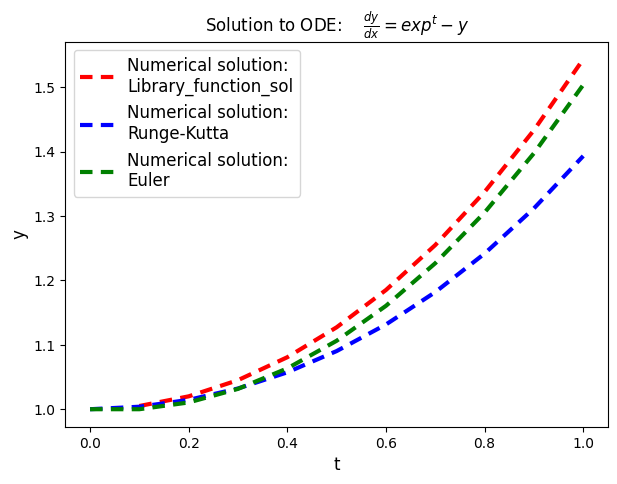

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(7,5))


plt.plot(t_l, y_l, label="Numerical solution:\nLibrary_function_sol", dashes=(3,2), color="red",lw=3)
plt.plot(t_R, y_R, label="Numerical solution:\nRunge-Kutta", dashes=(3,2), color="blue",lw=3)
plt.plot(t_E, y_E, label="Numerical solution:\nEuler", dashes=(3,2), color="green",lw=3)

plt.legend(loc="best", fontsize=12)
plt.title(r"Solution to ODE: $\quad\frac{dy}{dx}=exp^t -y$")
plt.xlabel("t", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.show()


##Lab Task
```
1- Write the program for Heun's Method.
2- Write the code to make a table to compare error of Heun's, Euler's, RK4 by using analytical solution.
3- Repeat task 2 for three different DEs.



In [ ]:
"""Task 01 : 
              Program for Heun's Method """

def heun_method(f,t_initial, t_final,y_initial,h):
  numstep= int((t_final-t_initial) / h)
  t_values = [t_initial]
  y_values = [y_initial]
  print("Solving ODE by Heun's Method\n")
  print("#\ttn\tyn\n")
  for i in range(numstep):
    k1 = f(t_values[i], y_values[i])
    k2 = f((t_values[i] + h/2), (y_values[i] + k1*h/2))
    t_new = t_values[i] + h 
    y_new = y_values[i] + k2*h
    y_values.append(y_new)
    t_values.append(t_new)
    print("%d\t%f\t%f\n" %(i+1, t_values[i], y_values[i]))

  return t_values, y_values


Solving ODE by Heun's Method

#	tn	yn

1	0.000000	1.000000

2	0.100000	1.005127

3	0.200000	1.020298

4	0.300000	1.045665

5	0.400000	1.081484

6	0.500000	1.128115

7	0.600000	1.186026

8	0.700000	1.255797

9	0.800000	1.338128

10	0.900000	1.433842



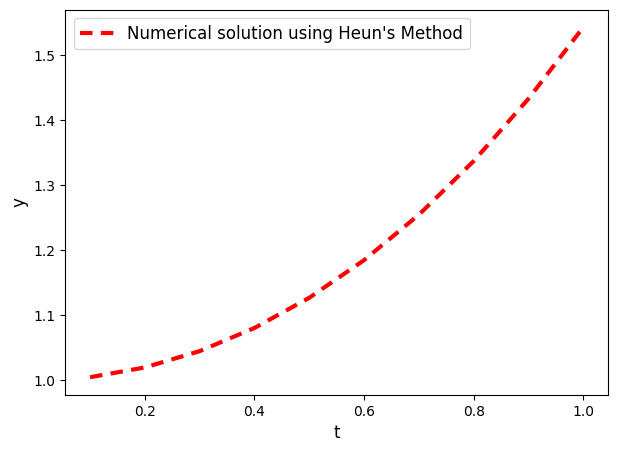

In [ ]:
import numpy as np
def f(t,y):
  return np.exp(t)-y

t_Heun,y_Heun = heun_method(f, t_initial=0, t_final=1, y_initial=1,h= 0.1)

import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(7,5))
plt.plot(t_l, y_l, label="Numerical solution using Heun's Method", dashes=(3,2), color="red",lw=3)

plt.legend(loc="best", fontsize=12)
plt.xlabel("t", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.show()


In [ ]:
"""Task 02 : Write the code to make a table to compare error of Heun's, Euler's, RK4 by using analytical solution"""

import numpy as np
from scipy.integrate import solve_ivp


def makeTable(f, t_initial, t_final, y_initial, h):
  tableData = []
  num_steps = int((t_final-t_initial)/h)
  sol = solve_ivp(f, [t_initial, t_final], [y_initial], t_eval = np.array(np.linspace(t_initial, t_final, num_steps)))
  t_l=sol.t
  y_l=sol.y.flatten()
  t_Heun,y_Heun = heun_method(f, t_initial, t_final, y_initial,h)
  t_R,y_R=RK4_method(f, t_initial, t_final, y_initial,h)
  t_E,y_E=euler_method(f, t_initial, t_final, y_initial,h)

  for i in range(len(t_l)):
    error_Euler = abs(y_E[i] - y_l[i])
    error_Heun =  abs(y_Heun[i] - y_l[i])
    error_RK4 = abs(y_R[i] - y_l[i])
    tableData.append([i+1, t_E[i] , y_l[i], y_E[i], error_Euler, y_Heun[i], error_Heun, y_R[i], error_RK4])
  return tableData



In [ ]:
from prettytable import PrettyTable

import numpy as np
def f(t,y):
  return np.exp(t)-y

# create the table
table = PrettyTable()
table.field_names = ["#", "Tn", "Y-Sol", "Y-Euler", "Error-Euler", "Y-Heun", "Error-Heun", "Y-RK4", "Error-RK4"]
data = makeTable(f,0,1, 1, 0.1)
for tabledata in data:
  table.add_row(tabledata)
  
print(table)

Solving ODE by Heun's Method

#	tn	yn

1	0.000000	1.000000

2	0.100000	1.005127

3	0.200000	1.020298

4	0.300000	1.045665

5	0.400000	1.081484

6	0.500000	1.128115

7	0.600000	1.186026

8	0.700000	1.255797

9	0.800000	1.338128

10	0.900000	1.433842


-------Solving ODE By RK4 Method-------
----------------------
#	tn	yn
----------------------
1	0.10	1.0039
----------------------
2	0.20	1.0145
----------------------
3	0.30	1.0322
----------------------
4	0.40	1.0573
----------------------
5	0.50	1.0903
----------------------
6	0.60	1.1316
----------------------
7	0.70	1.1818
----------------------
8	0.80	1.2416
----------------------
9	0.90	1.3118
----------------------
10	1.00	1.3931
----------------------

-------Solving ODE By Euler Method-------
----------------------
#	tn	yn
----------------------
1	0.10	1.0000
----------------------
2	0.20	1.0105
----------------------
3	0.30	1.0316
----------------------
4	0.40	1.0634
----------------------
5	0.50	1.1063
----------------------
6	

In [ ]:
""" 
    Task-03: Repeat task 2 for three different DEs
    Taken from Excercise Set 5.4  Q4(c) Burden Book
    DE-1: y' = y^2+y/t ; 1<t<3 and y(1)=-2 h=0.2 

"""

from prettytable import PrettyTable

def f(t,y):  #For DE-1
  return (y**2+y)/t

# create the table
print("\nFor DE-1\n")
table = PrettyTable()
table.field_names = ["#", "Tn", "Y-Sol", "Y-Euler", "Error-Euler", "Y-Heun", "Error-Heun", "Y-RK4", "Error-RK4"]
data = makeTable(f,1,3, -2, 0.2)
for tabledata in data:
  table.add_row(tabledata)
  
print(table)

Solving ODE by Heun's Method

#	tn	yn

1	1.000000	-2.000000

2	1.200000	-1.738182

3	1.400000	-1.579760

4	1.600000	-1.475908

5	1.800000	-1.403127

6	2.000000	-1.349457

7	2.200000	-1.308307

8	2.400000	-1.275781

9	2.600000	-1.249436

10	2.800000	-1.227671


-------Solving ODE By RK4 Method-------
----------------------
#	tn	yn
----------------------
1	1.20	-1.8163
----------------------
2	1.40	-1.7017
----------------------
3	1.60	-1.6146
----------------------
4	1.80	-1.5453
----------------------
5	2.00	-1.4889
----------------------
6	2.20	-1.4424
----------------------
7	2.40	-1.4035
----------------------
8	2.60	-1.3706
----------------------
9	2.80	-1.3424
----------------------
10	3.00	-1.3180
----------------------

-------Solving ODE By Euler Method-------
----------------------
#	tn	yn
----------------------
1	1.20	-1.6000
----------------------
2	1.40	-1.4400
----------------------
3	1.60	-1.3495
----------------------
4	1.80	-1.2905
----------------------
5	2.00	-1.2489


In [ ]:
"""
    Task-03 : Solving for second DE
    Taken from Excercise Set 5.4  Q4(d) Burden Book
    
    DE-2: y' = -ty + 4t/y ; 0<t<1 and y(0)= 1 h=0.1
"""

from prettytable import PrettyTable

def g(t,y):  #For DE-1
  return ((4*t/y) -(t*y))

# create the table
print("\nFor DE-1\n")
table = PrettyTable()
table.field_names = ["#", "Tn", "Y-Sol", "Y-Euler", "Error-Euler", "Y-Heun", "Error-Heun", "Y-RK4", "Error-RK4"]
data = makeTable(g,0,1, 1, 0.1)
for tabledata in data:
  table.add_row(tabledata)
  
print(table)


For DE-1

Solving ODE by Heun's Method

#	tn	yn

1	0.000000	1.000000

2	0.100000	1.015000

3	0.200000	1.057829

4	0.300000	1.122863

5	0.400000	1.203028

6	0.500000	1.291506

7	0.600000	1.382582

8	0.700000	1.471854

9	0.800000	1.556155

10	0.900000	1.633369


-------Solving ODE By RK4 Method-------
----------------------
#	tn	yn
----------------------
1	0.10	1.0134
----------------------
2	0.20	1.0462
----------------------
3	0.30	1.0910
----------------------
4	0.40	1.1430
----------------------
5	0.50	1.1984
----------------------
6	0.60	1.2545
----------------------
7	0.70	1.3092
----------------------
8	0.80	1.3610
----------------------
9	0.90	1.4087
----------------------
10	1.00	1.4514
----------------------

-------Solving ODE By Euler Method-------
----------------------
#	tn	yn
----------------------
1	0.10	1.0000
----------------------
2	0.20	1.0300
----------------------
3	0.30	1.0871
----------------------
4	0.40	1.1648
----------------------
5	0.50	1.2556
--------------